<a href="https://colab.research.google.com/github/ronakraut2004/retail-sales-eda/blob/main/EDAofretailsalesdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/retail_sales_dataset.csv')  # Replace with your actual file name/path


In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [6]:
df.duplicated().sum()


np.int64(0)

In [7]:
df.shape
df.columns
df.head(3)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30


In [8]:
df.select_dtypes(include='number').columns


Index(['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount'], dtype='object')

In [9]:
df.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [16]:


numeric_columns = df.select_dtypes(include='number').columns

for col in numeric_columns:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()
    std_dev_val = df[col].std()

    print(f"Column: {col}")
    print(f"  Mean: {mean_val}")
    print(f"  Median: {median_val}")
    # Mode can return multiple values if there are ties
    print(f"  Mode: {list(mode_val.values)}")
    print(f"  Standard Deviation: {std_dev_val}")
    print("-" * 30)

Column: Transaction ID
  Mean: 500.5
  Median: 500.5
  Mode: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(

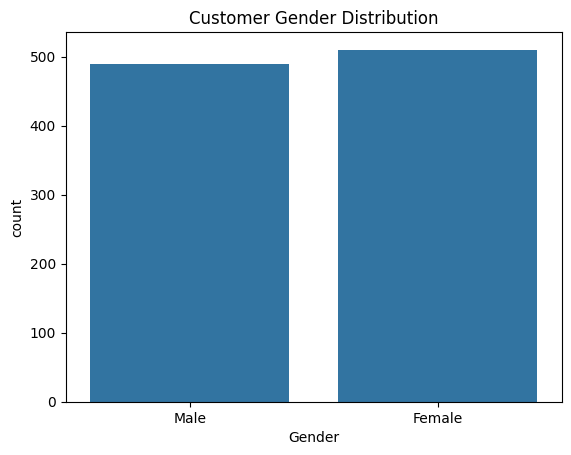

In [17]:
sns.countplot(x='Gender', data=df)
plt.title("Customer Gender Distribution")
plt.show()

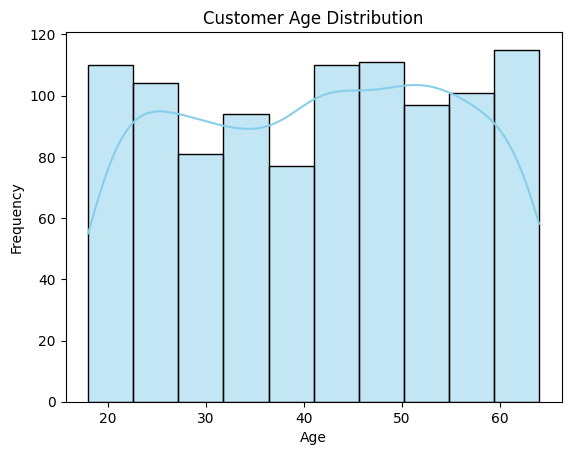

In [21]:
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


<ipython-input-22-3621253746>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories_by_quantity.values, y=top_categories_by_quantity.index, palette='Blues_d')


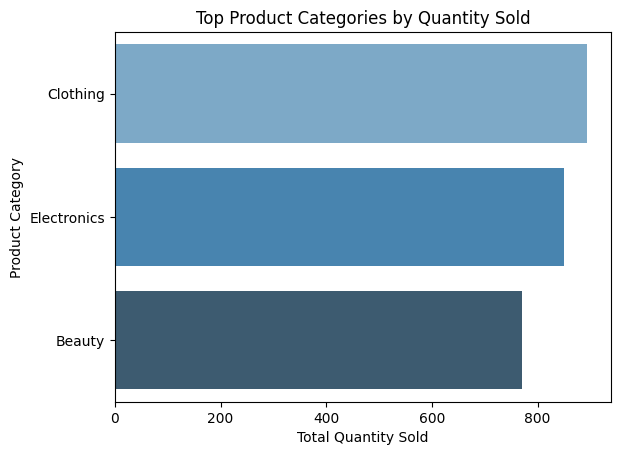

In [22]:
top_categories_by_quantity = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

sns.barplot(x=top_categories_by_quantity.values, y=top_categories_by_quantity.index, palette='Blues_d')
plt.title("Top Product Categories by Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Category")
plt.show()


<ipython-input-23-3136836261>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories_by_revenue.values, y=top_categories_by_revenue.index, palette='Greens_d')


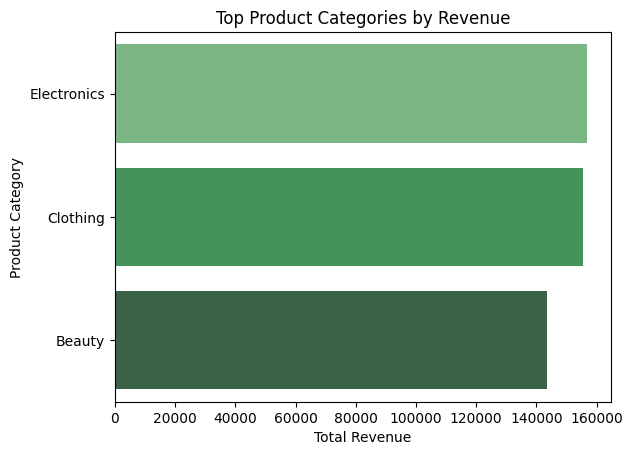

In [23]:
top_categories_by_revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

sns.barplot(x=top_categories_by_revenue.values, y=top_categories_by_revenue.index, palette='Greens_d')
plt.title("Top Product Categories by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.show()


In [24]:
# Average total amount spent by gender
gender_spending = df.groupby('Gender')['Total Amount'].mean()
print("Average spending by gender:\n", gender_spending)


Average spending by gender:
 Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


In [26]:
# Find top 10% spenders
top_10_percent = df[df['Total Amount'] > df['Total Amount'].quantile(0.9)]
print("Top 10% spenders count:", top_10_percent['Customer ID'].nunique())


Top 10% spenders count: 99


In [27]:
# Revenue by category
category_revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("Revenue by product category:\n", category_revenue)


Revenue by product category:
 Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [28]:
# Quantity by category
category_quantity = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
print("Quantity sold by product category:\n", category_quantity)


Quantity sold by product category:
 Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


In [29]:
# Create a DataFrame of recommendations for display/export
recommendations = {
    "Insight": [
        "Female customers spend more on average.",
        "Customers aged 20-40 are the majority.",
        "Top 10% of customers contribute significantly to revenue.",
        "Electronics and Clothing generate the most revenue.",
        "Beauty and Clothing have highest quantity sold.",
        "Some categories generate very low revenue.",
        "Revenue across categories shows high variability."
    ],
    "Recommendation": [
        "Create targeted offers for female shoppers.",
        "Focus product/UX design around 20–40 age range.",
        "Implement loyalty rewards for high spenders.",
        "Increase promotions on Electronics and Clothing.",
        "Use bundle offers on Beauty and Clothing products.",
        "Evaluate and consider discontinuing low-sellers.",
        "Apply dynamic pricing on high-variance products."
    ]
}

recommendations_df = pd.DataFrame(recommendations)
print(recommendations_df)


                                             Insight  \
0            Female customers spend more on average.   
1             Customers aged 20-40 are the majority.   
2  Top 10% of customers contribute significantly ...   
3  Electronics and Clothing generate the most rev...   
4    Beauty and Clothing have highest quantity sold.   
5         Some categories generate very low revenue.   
6  Revenue across categories shows high variability.   

                                      Recommendation  
0        Create targeted offers for female shoppers.  
1    Focus product/UX design around 20–40 age range.  
2       Implement loyalty rewards for high spenders.  
3   Increase promotions on Electronics and Clothing.  
4  Use bundle offers on Beauty and Clothing produ...  
5   Evaluate and consider discontinuing low-sellers.  
6   Apply dynamic pricing on high-variance products.  
